# 

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
Y = iris.target

In [4]:
def Distance(object1, object2):
    return ((object1[0] - object2[0])**2 + (object1[1] - object2[1])**2 + (object1[2] - object2[2])**2 + (object1[3] - object2[3])**2)**(1/2)

In [5]:
def Kernel(r):
    if (r<=1):
        return (3/4)*(1-r**2)
    else:
        return 0

In [6]:
def PredictByKernel(object, k=5):
    neighbors_distance = []
    for i in range(0, len(X)):
        neighbors_distance.append((Distance(object, X[i]), Y[i]))
        
    neighbors_distance.sort()
    sum_first_class = 0
    sum_second_class = 0
    sum_third_class = 0
    for i in range(1, k+1):
        if(neighbors_distance[i][1] == 0):
            sum_first_class += Kernel(neighbors_distance[i][0] / neighbors_distance[k+2][0] )
        if(neighbors_distance[i][1] == 1):
            sum_second_class += Kernel(neighbors_distance[i][0] / neighbors_distance[k+2][0])
        if(neighbors_distance[i][1] == 2):
            sum_third_class += Kernel(neighbors_distance[i][0] / neighbors_distance[k+2][0])

    if(sum_first_class >= sum_second_class and sum_first_class >= sum_third_class):
        return 0;
    else:
        if(sum_second_class > sum_first_class and sum_second_class >= sum_third_class):
            return 1;
        else:
            return 2;

In [7]:
def Predict(object, k=5):
    neighbors_distance = []
    for i in range(0, len(X)):
        neighbors_distance.append((Distance(object, X[i]), Y[i]))

    neighbors_distance.sort()
    sum_first_class = 0
    sum_second_class = 0
    sum_third_class = 0
    for i in range(1, k+1):
        if(neighbors_distance[i][1] == 0):
            sum_first_class += 1
        if(neighbors_distance[i][1] == 1):
            sum_second_class += 1
        if(neighbors_distance[i][1] == 2):
            sum_third_class += 1

    if(sum_first_class >= sum_second_class and sum_first_class >= sum_third_class):
        return 0;
    else:
        if(sum_second_class > sum_first_class and sum_second_class >= sum_third_class):
            return 1;
        else:
            return 2;

In [19]:
def Loo(k):
    sum_errors = 0
    for i in range(0, len(X)):
        if PredictByKernel(X[i], k) != Y[i]:
            sum_errors += 1;
    accuracy = (len(X)-sum_errors)/len(X)
    return sum_errors

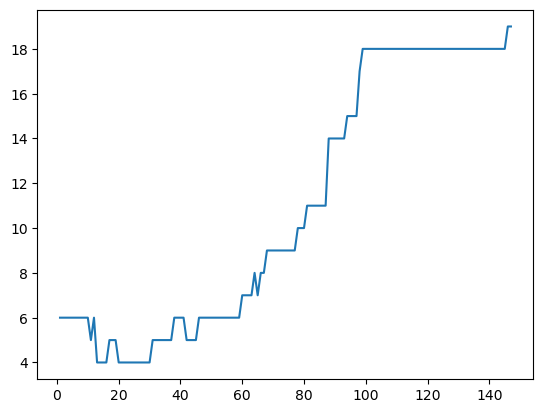

In [22]:
save_y = []
save_x = []
for i in range(1, len(X)-2):
    save_x.append(i)
    save_y.append(Loo(i))
    #print(f"LOO({i}) {save_y[i-1]}")

import matplotlib.pyplot as plt
plt.figure()
plt.plot(save_x, save_y)
plt.show()